In [12]:
import pandas as pd

train = pd.read_csv("train.csv")

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
age_mean = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_mean) # Nan 교첸

features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']

X = pd.get_dummies(train[features], drop_first=True)
X['Sex_male'] = X['Sex_male'].astype('int')

y = train['Survived']

In [15]:
y.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [16]:
X.values

array([[ 3.        , 22.        ,  7.25      ,  1.        ,  0.        ,
         1.        ],
       [ 1.        , 38.        , 71.2833    ,  1.        ,  0.        ,
         0.        ],
       [ 3.        , 26.        ,  7.925     ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  1.        ,  2.        ,
         0.        ],
       [ 1.        , 26.        , 30.        ,  0.        ,  0.        ,
         1.        ],
       [ 3.        , 32.        ,  7.75      ,  0.        ,  0.        ,
         1.        ]])

In [17]:
import numpy as np
n_sample = len(y)
n_samples_per_class = np.bincount(y)

gini = 1.0
for a in n_samples_per_class:
    gini -= (a / n_sample) ** 2

print(gini)    

0.4730129578614428


In [18]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3):
        self.max_depth = max_depth
        self.tree = None
        
    def gini(self, y):
        n_sample = len(y)
        n_samples_per_class = np.bincount(y)
        
        gini = 1.0
        for a in n_samples_per_class:
            gini -= (a / n_sample) ** 2
        

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)
model.fit(X.values, y.values)

DecisionTreeClassifier(max_depth=10)

In [20]:
(model.predict(X.values) == y).mean()

np.float64(0.9113355780022446)

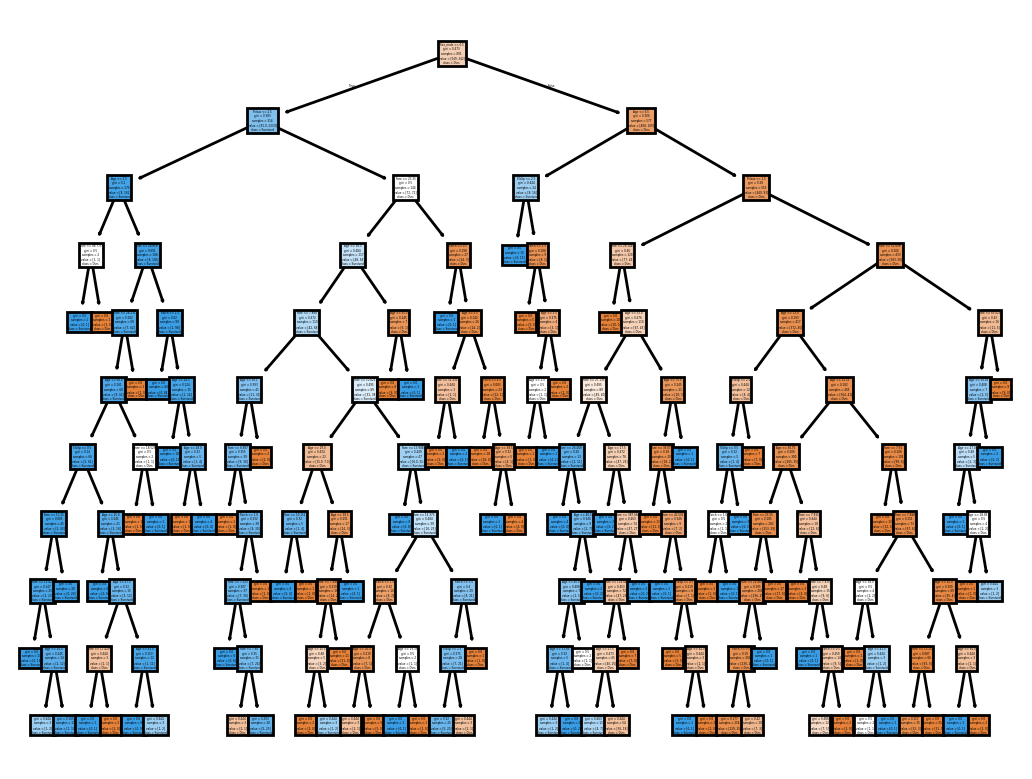

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(dpi = 200)

_ = tree.plot_tree(model, feature_names=X.columns, class_names=["Dies", "Survived"], filled=True)

In [22]:
(model.predict(X.values) == y).mean()

np.float64(0.9113355780022446)

In [24]:
test = pd.read_csv('test.csv')

test['Age'].fillna(test['Age'].median(), inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)
X_test = pd.get_dummies(test[features], drop_first=True)

if 'Sex_male' not in X_test.columns:
    X_test['Sex_male'] = 0
test['Survived'] = model.predict(X_test.values)


submission = test[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)

/tmp/ipykernel_7728/554553693.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
/tmp/ipykernel_7728/554553693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 